----
# Question 1: Compute mean with gradient descent
Question statement: Suppose we have `N` numbers and we have to determine their mean. Develop a gradient descent rule to achieve this.

----
## Solution
Let $N$ numbers be given $X = \{X_1, \dots, X_N\}$. We wish to compute a guess to the mean $\mu$ using gradient descent. 


To implement gradient descent, we need
 1. **A loss function $L(\mu)$**: Here we use the mean-squared error. 
 $$L(x) = \frac{1}{2}\sum_{i = 1}^N (\mu - X_i)^2$$
 Exercise: Prove that that the true mean $\mu^*$ is the unique minimum of $L(\mu)$. Hint: Just take first derivative and set it to zero. (Note, this is the same as proving that the maximum-likelihood estimator of the mean of a Gaussian distribution is the sample mean and is the same as the value that minimises the mean-square-error). 
 2. **Gradient of the loss function**: The loss function is a function of the single variable $\mu$, so the gradient is just the derivative of $L$ with respect to $\mu$, 
 $$\frac{d}{d\mu} L(\mu) = \sum_{i = 1}^N (\mu - X_i)$$
 3. **Update rule**: Our new guess of $\mu$ is updated by going in the opposite direction of the gradient by a step of length $\eta$ (= learning rate). 
 $$\mu_{new} = \mu_{previous} - \eta * \frac{d}{d\mu} L(\mu_{previous})$$
----
## Implementation

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Randomly generate data
N = 100
X = np.random.randint(1, 100, size=N)
actual_mean = np.mean(X)
print(f"Actual mean: {actual_mean}")

Actual mean: 45.24


### Define the loss, gradient of the loss and the update rule. 

In [6]:

def loss(mu):
    # Have to be differentiable
    # We want this to be smallest when mu = actual mean. 
    # We also want this to have "good" gradient away from the actual mean.
    return np.sum((mu - X) **2) / 2

def grad(mu):
    return np.sum(mu - X)

def step(mu, step_size=0.0001):
    # update mu according to the rule
    # mu <- mu - step_size * gradient at mu
    return mu - step_size * grad(mu)

### Actually doing the gradient descent. 


Epoch: 0	Current guess: 34	Loss: 49961.0	
Epoch: 100	Current guess: 41.12579648408892	Loss: 44490.453528516744	
Epoch: 200	Current guess: 43.73406845459652	Loss: 43757.51149097206	
Epoch: 300	Current guess: 44.68878035063874	Loss: 43659.3121550921	
Epoch: 400	Current guess: 45.03823578118849	Loss: 43646.15543999964	
Epoch: 500	Current guess: 45.166147770603246	Loss: 43644.39270758934	
Epoch: 600	Current guess: 45.212967695565645	Loss: 43644.15653727414	
Epoch: 700	Current guess: 45.230105302317874	Loss: 43644.12489525212	
Epoch: 800	Current guess: 45.236378220641235	Loss: 43644.120655864295	
Epoch: 900	Current guess: 45.23867431162171	Loss: 43644.120087872485	
Final guess: 45.239514755179115


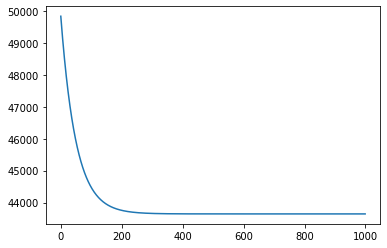

In [7]:

num_epoch = 1000 # number of iteration of GD. 
mu = np.random.randint(1, 100)  # random initial guess. 
logging_rate = 100 # print out something every 100 iteration. 

loss_record = []
for epoch in range(num_epoch):
    
    # We print out a record of where the optimisation is up to 
    # every logging_rate number of epoch
    if epoch % logging_rate == 0:
        print(f"Epoch: {epoch}\tCurrent guess: {mu}\tLoss: {loss(mu)}\t")
    mu = step(mu)
    loss_record.append(loss(mu))
print(f"Final guess: {mu}")

# Plot how the loss decreases with epoch.
plt.plot(loss_record)